# Geometría visual

Primeros pasos con puntos y rectas del plano, usando [coordenadas homogéneas](https://en.wikipedia.org/wiki/Homogeneous_coordinates).

## Resumen teórico informal

### Espacio vectorial

Es un conjunto cuyos elementos se pueden expresar como **combinación lineal** de algunos de ellos, la **base** de representación, elegida por conveniencia. Los coeficientes de la combinación son las **coordenadas** del elemento en esa base.

$$ \vec{x} = x_1 \vec{e}^1 + x_2 \vec{e}^2 + \ldots x_n \vec{e}^n  = \begin{bmatrix}\vec{e}^1 & \vec{e}^2 & \ldots&\vec{e}^1\end{bmatrix} \begin{bmatrix}x_1\\x_2\\\vdots\\x_n\end{bmatrix} = E\; \boldsymbol x$$

Normalmente identificamos el vector $\vec{x}$ con la tupla de coordenadas $\boldsymbol{x}$, dando por supuesta la base.

### Transformación lineal

Es la más natural para operar con espacios vectoriales. El resultado de una combinación lineal es una combinación lineal de resultados:

$$T(a \boldsymbol x + b \boldsymbol y) = a T(\boldsymbol x) + b T(\boldsymbol y)$$

Por tanto, queda completamente definida por su acción sobre la base.

Las coordenadas del resultado son combinaciones lineales de coordenadas de la entrada: solo involucran multiplicaciones por constantes y sumas. La transformación se puede representar mediante una **matriz de coeficientes**.

La implementación de la aplicación de la transformación a un vector es un producto matrix-vector.

La composición de transformaciones da lugar a un producto de matrices.


Si conseguimos reformular un problema mediante espacios vectoriales y transformaciones lineales daremos un paso muy importante hacia su resolución, al disponer de las potentes herramientas de álgebra lineal.

El cambio de base es una transformación lineal.

Los cambios de escala y las rotaciones son también transformaciones lineales.

Los desplazamientos no lo son (aunque por su simplicidad no tiene mucha importancia), ni tampoco las transformaciones de perspectiva, en la que aparece una división de coordenadas. 

### Producto escalar

Los vectores, sin más, son entes abstractos. Es mejor trabajar en un espacio euclídeo, donde los vectores tienen tamaño y podemos medir distancias y ángulos entre ellos. Esto se consigue si hay una **métrica**. Basta con tener una función (bi)lineal que, dados, dos vectores, produce un número, que indica de alguna manera el grado de alineamiento entre ellos (**inner product**). Con ella podemos definir el módulo de un vector y con ello distancias y ángulos.

Cuando un plano se transforma, se transforma también la métrica.

¿Qué ocurre con su métrica cuando un plano sufre una transformación de perspectiva?

### Producto vectorial

El producto vectorial (*[cross product](https://en.wikipedia.org/wiki/Cross_product)*) de dos vectores $\vec u$ y  $\vec v$  de $\mathbb R^3$ produce un vector $\vec w = \vec u \times \vec v$  perpendicular a ambos, cuyo módulo es el área del paralelogramo definido por $\vec u$ y $\vec v$, y su dirección viene dada por la regla de la mano derecha.

### Coordenadas homogéneas

$\mathbb R^2  \rightarrow \mathbb P^2$

$(x,y) \rightarrow \lambda(x,y,1) $

$(2,-3) \rightarrow (2,-3,1) \sim (10,-15,5) \sim (-1, 1.5, -0.5)  $

$\mathbb P^2  \rightarrow \mathbb R^2$

$(x,y,w) \rightarrow \left(\frac{x}{w}, \frac{y}{w} \right)$

El proceso es el mismo en 3D: $\mathbb R^3  \rightarrow \mathbb P^3$

Un punto ordinario se representa con un espacio vectorial: todos los puntos de la recta que une el punto ampliado y el origen (rayo).

Los puntos homogéneos con $w=0$ (rayos horizontales que no cortan el plano $w=1$) no tienen correspondiente punto ordinario. Son puntos ideales, o del infinito, en cada dirección. Podemos operar con ellos de forma natural sin problemas computacionales de ningún tipo. Solo hay que tener cuidado a la hora de representar gráficamente el resultado final. 

### Puntos y rectas

La ecuación de una recta de la forma $y=mx+b$ no vale para rectas verticales. Es mejor usar la forma implícita:

$$ax+by+c=0$$

Que puede intepretarse como 

$$l \cdot p =0$$

donde $l=(a,b,c)$ y $p=(x,y,w)$ son las coordenadas homogéneas de la recta y el punto. 

Recta que pasa por dos puntos:

$$l = p \times q$$

Intersección de dos rectas:

$$p = l \times m$$

El punto y la recta del plano son duales.

## Experimentos

In [1]:
import numpy as np
import numpy.linalg as la
import cv2   as cv

import matplotlib.pyplot as plt
from matplotlib.pyplot   import imshow, subplot, title, plot

%matplotlib inline

def fig(w,h):
    plt.figure(figsize=(w,h))

def readrgb(file):
    return cv.cvtColor( cv.imread('../images/'+file), cv.COLOR_BGR2RGB) 

# muestra un polígono cuyos nodos son las filas de un array 2D
def shcont(c, color='blue', nodes=True):
    x = c[:,0]
    y = c[:,1]
    x = np.append(x,x[0])
    y = np.append(y,y[0])
    plot(x,y,color)
    if nodes: plot(x,y,'.',color=color, markerSize=11)

def shpoint(p, color='blue'):
    plot(p[0],p[1],'.',color=color, markerSize=15)        
        
# dibuja una recta "infinita"
def shline(l,xmin=-2000,xmax=2000, color='red'):
    a,b,c = l / la.norm(l)
    if abs(b) < 1e-6:
        x = -c/a
        r = np.array([[x,-2000],[x,2000]])
    else:
        y0 = (-a*xmin - c) / b
        y1 = (-a*xmax - c) / b
        r = np.array([[xmin,y0],[xmax,y1]])
    shcont(r,color=color,nodes=False)

In [2]:
# convierte un conjunto de puntos ordinarios (almacenados como filas de la matriz de entrada)
# en coordenas homogéneas (añadimos una columna de 1)
def homog(x):
    ax = np.array(x)
    uc = np.ones(ax.shape[:-1]+(1,))
    return np.append(ax,uc,axis=-1)

# convierte en coordenadas tradicionales
def inhomog(x):
    ax = np.array(x)
    return ax[..., :-1] / ax[...,[-1]]


# producto vectorial (normalizando el resultado)
def cross(u,v):
    r = np.cross(u,v)
    return r / la.norm(r)

In [3]:
homog((1,2))

array([1., 2., 1.])

In [4]:
homog((1,2))

array([1., 2., 1.])

In [5]:
inhomog((6,4,2))

array([3., 2.])

In [6]:
homog([( 1,2),
       ( 4,4),
       (-3,3)])

array([[ 1.,  2.,  1.],
       [ 4.,  4.,  1.],
       [-3.,  3.,  1.]])

In [7]:
inhomog([(1,2,5),
         (4,4,2)])

array([[0.2, 0.4],
       [2. , 2. ]])

In [8]:
inhomog(3*homog([[1,2],
                 [4,4]]))

array([[1., 2.],
       [4., 4.]])

Vamos a practicar con las operaciones de "unión" e "intersección" de puntos y rectas con coordenadas homogéneas.

[1. 2. 1.]
[4. 4. 1.]
[-2.  3. -4.]


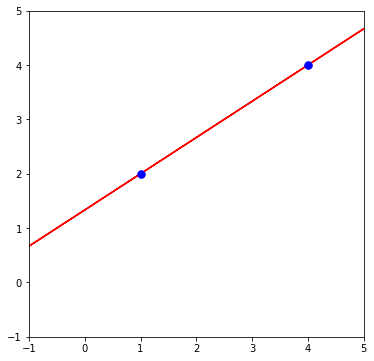

In [9]:
p, q = homog([(1,2),
              (4,4)])
print(p)
print(q)

l = np.cross(p,q)

print(l)

fig(6,6); plt.axis([-1,5,-1,5]);
shline(l)
shpoint(p)
shpoint(q)

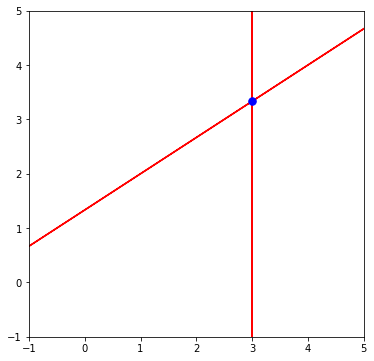

In [10]:
l = (2,-3,4)
m = (1,0,-3)

p = np.cross(l,m)

fig(6,6); plt.axis([-1,5,-1,5]);
shline(l)
shline(m)
shpoint(inhomog(p))

La intersección de rectas paralelas da un punto en el infinito, con el que se puede seguir trabajando tranquilamente.

[15 10  0]


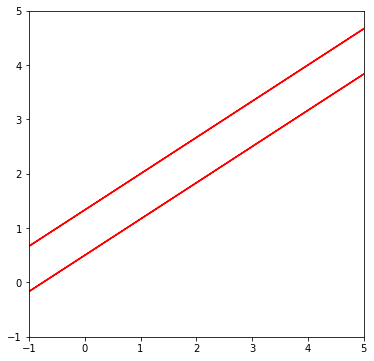

In [11]:
l = (2,-3,4)
m = (4,-6,3)

p = np.cross(l,m)
print(p)

fig(6,6); plt.axis([-1,5,-1,5]);
shline(l)
shline(m)

No hay problema en calcular la recta que pasa por un punto normal y otro en el infinito:

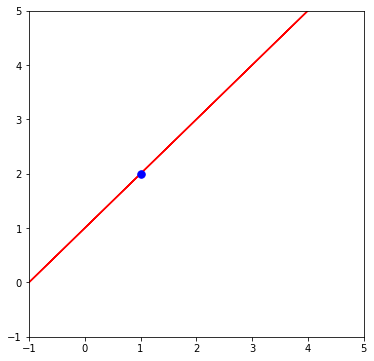

In [12]:
fig(6,6); plt.axis([-1,5,-1,5]);

shline(cross((1,2,1),(1,1,0)))
shpoint((1,2))

### Horizonte de un plano a partir de la imagen de un rectángulo

Vamos a calcular el horizonte de un plano uniendo los puntos de fuga de rectas que sabemos que en el mundo real son paralelas, obtenidas de la imagen de un rectángulo.

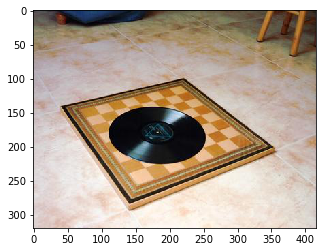

In [13]:
img = readrgb('disk1.jpg')

imshow(img);

En este caso los vértices del rectángulo se han tomado a mano y a ojo.

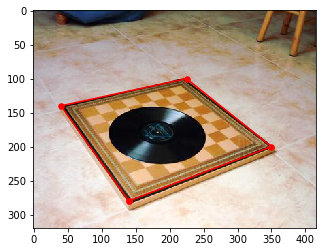

In [14]:
ref = np.array([
        [140,280],
        [40,140],
        [225,100],
        [350,200]])

imshow(img);
shcont(ref,color='red')

In [15]:
r0,r1,r2,r3 = href = homog(ref)
href

array([[140., 280.,   1.],
       [ 40., 140.,   1.],
       [225., 100.,   1.],
       [350., 200.,   1.]])

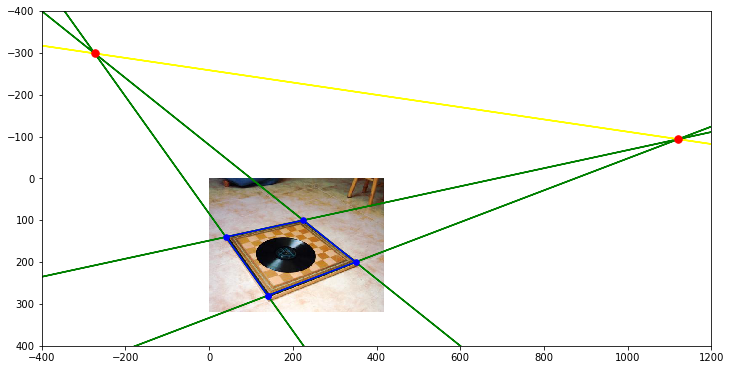

In [16]:
l1 = cross(r1,r2)
l2 = cross(r0,r3)

l3 = cross(r0,r1)
l4 = cross(r2,r3)

ph = cross(l1,l2)
qh = cross(l3,l4)

p = inhomog(ph)
q = inhomog(qh)

horiz = cross(ph,qh)

fig(12,12)
imshow(img)

shline(l1,color='green')
shline(l2,color='green')
shline(l3,color='green')
shline(l4,color='green')
shline(horiz,color='yellow')
shcont(ref);
shpoint(p,color='red')
shpoint(q,color='red')

plt.axis([-400,1200,400,-400]);

Por supuesto, lo ideal sería detectar automáticamente los vértices del rectángulo y mostrar el resultado en vivo con la webcam. Esto se deja como ejercicio opcional.

En una vista frontal de un rectángulo los puntos de fuga están en el infinito y el horizonte no se puede dibujar, pero la ecuación de la recta se calcula bien:

In [17]:
ref = np.array([
        [0,0],
        [0,1],
        [2,1],
        [2,0]])

href = homog(ref)

l1 = cross(href[1,:],href[2,:])
l2 = cross(href[0,:],href[3,:])

l3 = cross(href[0,:],href[1,:])
l4 = cross(href[2,:],href[3,:])

ph = cross(l1,l2)
qh = cross(l3,l4)

horiz = cross(ph,qh)

print(horiz)

[ 0.  0. -1.]


### Centro de un círculo definido por 3 puntos

Ejercicio.